# GSIBerror

In this notebook is shown a demonstration of the GSIBerror class to read the records and attributes from the background error covariance matrices compatible with the Gridpoint Statistical Interpolation (in the .gcv file format). The class wans't tested with regional matrices, but it should be possible to adapt the source to do so.

To use the class, load it with the following command:

In [1]:
from GSIBerror import Berror

The following python modules are optional and can be loaded in case the user wants to plot the matrix records. The module `cartopy` is loaded to plot the coastlines for the records related to the `sst`(sea surface temperature) only, since the remainder of the records are latitude dependent.

In [2]:
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

%matplotlib inline

In the following section, it is defined the file to be read. In this example, two matrices are handled at the same time, `fncep` (the DTC matrix) and `fcptec` (the CPTEC matrix). Both matrices have different dimensions, which will be further inspected:

In [3]:
path = 'gcv/'

bcptec = 'bcptec_bam_352pairs_gsir4.berror_stats.gcv.fix.oz.cw.tsm'
bncep = 'global_berror.l64y386.f77-ncep-dtc.gcv'

fncep = os.path.join(path, bncep)
fcptec = os.path.join(path, bcptec)

To use the class, it is necessary to create instances for each of the matrices to be read:

In [4]:
ncep_b = Berror(fncep)
cptec_b = Berror(fcptec)

The `read_records` method is used to read all of the records (ie., horizontal regression coefficients, vertical and horizontal lenght scales and standard deviations) from the matrices and their attributes (ie., number of latitude, longitude and vertical levels). The documentation of this method can be accessed by using the following command:


```Python
help(Berror.read_records)
```

In [5]:
help(Berror.read_records)

Help on function read_records in module GSIBerror:

read_records(self)
    read_records
    ------------
    
    This method reads the first three records of the background error covariance matrix (nlat, nlon and nsig).
    These records are used to calculate the size of the remainder records from the matrix. All attributes read from
    the matrix are provided by this function. The plotting of the records are made through the use of the xarray's 'plot()'
    method; depending on the use, it can be necessary to to load the matplotlib and cartopy modules.
    
    Parâmetros de entrada
    ---------------------
        None.
    
    Result
    ------
        bfile: object created with the records and attributes from the background error covariance matrix (see the list below)
               
    Available attributes
    --------------------
        file_name         : string with the name of the file
        nlat              : integer with the number of latitude points 
        nlon  

To read the records and attributes from the matrices through the instances `ncep_b` and `cptec_b`:

In [6]:
ncep_b.read_records()
cptec_b.read_records()

To check the matrices attributes, just use the class instance for the desired matrix with one of the following attribute names:
 
* `nlat`: number of latitude points;
* `nlon`: number of longitude points;
* `nsig`: number of vertical levels.

In [7]:
ncep_b.nlat, ncep_b.nlon, ncep_b.nsig

(386, 768, 64)

In [8]:
cptec_b.nlat, cptec_b.nlon, cptec_b.nsig

(386, 768, 64)

To check the matrices attributes, just use the class instance for the desired matrix with one of the following attribute names:
 
* `balprojs`: horizontal regression coefficients;
* `amplitudes`: standard deviations of the GSI control variables;
* `hscales`: horizontal length scales;
* `vscales`: vertical length scales.

In [9]:
ncep_b.balprojs

{'agvin': <xarray.DataArray 'agvin' (level: 64, latitude: 386, level_2: 64)>
 array([[[ 9.1390668e-39, -1.4570713e-08, -1.4229909e-08, ...,
           1.9885631e-07, -3.0927532e-07, -1.5866360e-07],
         [ 1.9645067e-07,  2.0414565e-07,  2.1749047e-07, ...,
           3.9498239e-08,  2.1559554e-08, -2.6009864e-08],
         [ 1.9645067e-07,  2.0414565e-07,  2.1749047e-07, ...,
           3.9498239e-08,  2.1559554e-08, -2.6009864e-08],
         ...,
         [-4.0456254e-07, -4.1785779e-07, -4.3682641e-07, ...,
           4.0088888e-10, -7.6423277e-08,  3.1785959e-08],
         [-4.0533263e-07, -4.1864789e-07, -4.3763430e-07, ...,
           5.5518179e-10, -7.6580413e-08,  3.1765442e-08],
         [-4.0576197e-07, -4.1908416e-07, -4.3808009e-07, ...,
           6.3978484e-10, -7.6664413e-08,  3.1752339e-08]],
 
        [[-4.0576197e-07, -4.1908416e-07, -4.3808009e-07, ...,
           6.3978484e-10, -7.6664413e-08,  3.1752339e-08],
         [ 1.9722712e-07,  2.0493923e-07,  2.1830989

Note that the `balprojs` records are stored in a dictionary with three keys `agvin`, `bgvin` and `wgvin`. These are the horizontal regression coefficients used by GSI to construct the balanced      part of the temperature, velocity potential and surface pressure, respectively:
 
* `agvin`: horizontal regression coefficients for the temperature;
* `bgvin`: horizontal regression coefficients for the velocity potential;
* `wgvin`: horizontal regression coefficients for the surface pressure.
 
Quoting the GSI manual*:

> Because of the size of the model variables, the full size of a B matrix is extremely large. It is typically on the order of $10^{6} \times 10^{6}$, which in its present form cannot be stored in any computer. This problem is simplified by using an ideal set of analysis variables for which the analysis is performed. These are generally referred to as "analysis control variables". The analysis control variables are selected such that the cross-correlations between these variables are minimum, which means less off-diagonal terms in B. The cross dependency among these analysis control variables is removed. The balance between analysis variables (such as mass and wind fields) are achieved with pre-computed "regression coefficients". Further, the forecast errors are modeled as a Gaussian distribution with pre-computed variances and "lengthscale" parameters for each of the analysis control variables. We will use the following sub-sections to briefly introduce how GSI processes these pre-computed background error statistics and applies them in a GSI analysis.

---

*Available at [https://dtcenter.org/community-code/gridpoint-statistical-interpolation-gsi/documentation](https://dtcenter.org/community-code/gridpoint-statistical-interpolation-gsi/documentation).

These records with the horizontal regression coefficients can be accessed in the following way:

In [10]:
ncep_b.balprojs['agvin']

<xarray.DataArray 'agvin' (level: 64, latitude: 386, level_2: 64)>
array([[[ 9.1390668e-39, -1.4570713e-08, -1.4229909e-08, ...,
          1.9885631e-07, -3.0927532e-07, -1.5866360e-07],
        [ 1.9645067e-07,  2.0414565e-07,  2.1749047e-07, ...,
          3.9498239e-08,  2.1559554e-08, -2.6009864e-08],
        [ 1.9645067e-07,  2.0414565e-07,  2.1749047e-07, ...,
          3.9498239e-08,  2.1559554e-08, -2.6009864e-08],
        ...,
        [-4.0456254e-07, -4.1785779e-07, -4.3682641e-07, ...,
          4.0088888e-10, -7.6423277e-08,  3.1785959e-08],
        [-4.0533263e-07, -4.1864789e-07, -4.3763430e-07, ...,
          5.5518179e-10, -7.6580413e-08,  3.1765442e-08],
        [-4.0576197e-07, -4.1908416e-07, -4.3808009e-07, ...,
          6.3978484e-10, -7.6664413e-08,  3.1752339e-08]],

       [[-4.0576197e-07, -4.1908416e-07, -4.3808009e-07, ...,
          6.3978484e-10, -7.6664413e-08,  3.1752339e-08],
        [ 1.9722712e-07,  2.0493923e-07,  2.1830989e-07, ...,
          3.6942918e-08,  2.0000796e-08, -2.4325955e-08],
        [ 1.9722712e-07,  2.0493923e-07,  2.1830989e-07, ...,
          3.6942918e-08,  2.0000796e-08, -2.4325955e-08],
...
        [-1.4934518e-08, -1.4844422e-08, -1.4163690e-08, ...,
         -2.2026695e-07, -7.9369016e-08,  3.3956766e-07],
        [-1.5031601e-08, -1.4944586e-08, -1.4267745e-08, ...,
         -2.2030216e-07, -7.9460399e-08,  3.3963573e-07],
        [-1.5084682e-08, -1.5000639e-08, -1.4326437e-08, ...,
         -2.2031999e-07, -7.9510286e-08,  3.3967311e-07]],

       [[-1.5084682e-08, -1.5000639e-08, -1.4326437e-08, ...,
         -2.2031999e-07, -7.9510286e-08,  3.3967311e-07],
        [ 8.5512752e-09,  8.5789829e-09,  8.2154630e-09, ...,
          2.4457648e-07,  8.1705295e-08, -3.7984395e-07],
        [ 8.5512752e-09,  8.5789829e-09,  8.2154630e-09, ...,
          2.4457648e-07,  8.1705295e-08, -3.7984395e-07],
        ...,
        [-1.4472619e-08, -1.4127865e-08, -1.2758253e-08, ...,
         -3.0925835e-07, -1.5847982e-07,  4.0097532e-07],
        [-1.4536464e-08, -1.4193026e-08, -1.2824126e-08, ...,
         -3.0927063e-07, -1.5859801e-07,  4.0104135e-07],
        [-1.4570713e-08, -1.4229909e-08, -1.2862232e-08, ...,
         -3.0927532e-07, -1.5866360e-07,  4.0107770e-07]]], dtype=float32)
Coordinates:
  * latitude  (latitude) float64 -90.0 -89.53 -89.06 -88.6 ... 89.06 89.53 90.0
  * level     (level) int64 1 2 3 4 5 6 7 8 9 10 ... 56 57 58 59 60 61 62 63 64
  * level_2   (level_2) int64 1 2 3 4 5 6 7 8 9 ... 56 57 58 59 60 61 62 63 64

In [11]:
ncep_b.balprojs['bgvin']

<xarray.DataArray 'bgvin' (level: 64, latitude: 386)>
array([[ 0.31404725,  0.31404725,  0.31410804, ..., -0.3134667 ,
        -0.31346098, -0.31346098],
       [ 0.309024  ,  0.309024  ,  0.30907533, ..., -0.30182734,
        -0.30181533, -0.30181533],
       [ 0.29433075,  0.29433075,  0.29436478, ..., -0.27594185,
        -0.27591783, -0.27591783],
       ...,
       [ 0.02594377,  0.02594377,  0.02594201, ...,  0.06056742,
         0.06057847,  0.06057847],
       [-0.03358313, -0.03358313, -0.03357612, ...,  0.05812103,
         0.0581184 ,  0.0581184 ],
       [-0.04917536, -0.04917536, -0.049166  , ...,  0.05161405,
         0.0516182 ,  0.0516182 ]], dtype=float32)
Coordinates:
  * latitude  (latitude) float64 -90.0 -89.53 -89.06 -88.6 ... 89.06 89.53 90.0
  * level     (level) int64 1 2 3 4 5 6 7 8 9 10 ... 56 57 58 59 60 61 62 63 64

In [12]:
ncep_b.balprojs['wgvin']

<xarray.DataArray 'wgvin' (level: 64, latitude: 386)>
array([[-2.0349323e-07, -2.0356120e-07, -2.0368390e-07, ...,
         2.4741092e-07,  2.4741092e-07,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  9.1390668e-39]], dtype=float32)
Coordinates:
  * latitude  (latitude) float64 -90.0 -89.53 -89.06 -88.6 ... 89.06 89.53 90.0
  * level     (level) int64 1 2 3 4 5 6 7 8 9 10 ... 56 57 58 59 60 61 62 63 64

To retrieve the min and max values, eg., from the horizontal regression coefficients of the velocity potential (`bgvin`), use either the `min()` or `max()` methods from the `xarray` module:

In [13]:
ncep_b.balprojs['bgvin'].min()

<xarray.DataArray 'bgvin' ()>
array(-0.33616406, dtype=float32)

In [14]:
ncep_b.balprojs['bgvin'].max()

<xarray.DataArray 'bgvin' ()>
array(0.3307993, dtype=float32)

In a more direct way:

In [15]:
ncep_b.balprojs['bgvin'].values.min(), ncep_b.balprojs['bgvin'].values.max()

(-0.33616406, 0.3307993)

To plot the horizontal regression coefficients for the velocity potential `bgvin`, just use the `plot()` method from the `xarray` module:

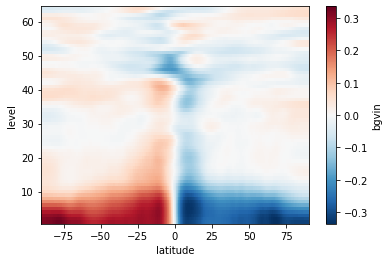

In [16]:
ncep_b.balprojs['bgvin'].plot()

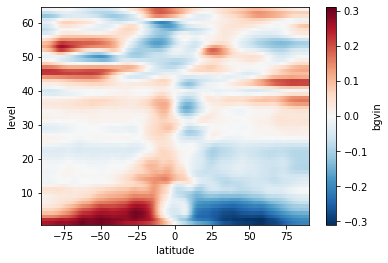

In [17]:
cptec_b.balprojs['bgvin'].plot()

To compare the horizontal regression coefficients for the instantiated matrices `ncep_b` and `cptec_b`, see the next examples.
  
Note that the horizontal regression coefficients for the temperature `agvin` have an extra dimension named `sigma_2`. This extra dimension needs to be set for one of the levels contained in the instances. Use attribute `levs` to retrieve the possible values for each instance. By doing `isel(sigma_2=0)` it is chosen the first level, next to the surface and `isel(sigma_2=-1)` it is chosen the last level, next to the model top.

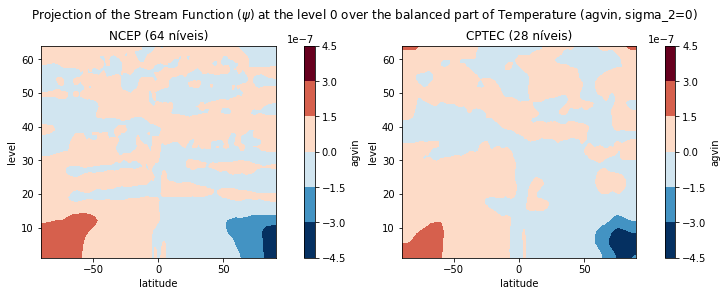

In [18]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.balprojs['agvin'].isel(level_2=0).plot.contourf(ax=ax[0])#, vmin=0, vmax=5e-7)
cptec_b.balprojs['agvin'].isel(level_2=0).plot.contourf(ax=ax[1])#, vmin=0, vmax=5e-7)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Projection of the Stream Function ($\psi$) at the level 0 over the balanced part of Temperature (agvin, sigma_2=0)')
plt.show()

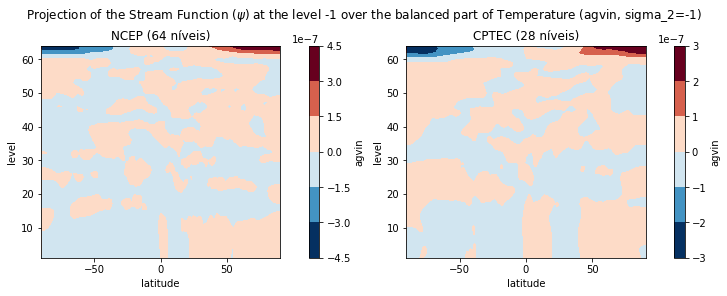

In [19]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.balprojs['agvin'].isel(level_2=-1).plot.contourf(ax=ax[0])#, vmin=0, vmax=5e-7)
cptec_b.balprojs['agvin'].isel(level_2=-1).plot.contourf(ax=ax[1])#, vmin=0, vmax=5e-7)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Projection of the Stream Function ($\psi$) at the level -1 over the balanced part of Temperature (agvin, sigma_2=-1)')
plt.show()

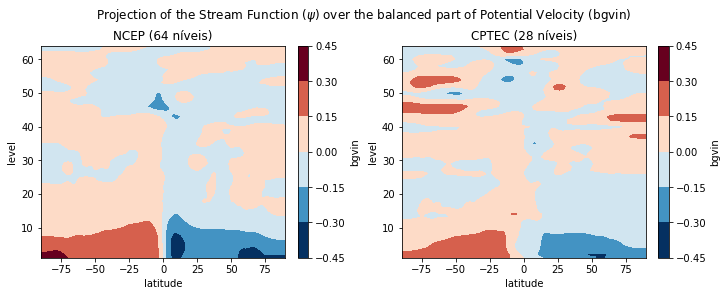

In [20]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.balprojs['bgvin'].plot.contourf(ax=ax[0])#, vmin=0, vmax=0.5)
cptec_b.balprojs['bgvin'].plot.contourf(ax=ax[1])#, vmin=0, vmax=0.5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Projection of the Stream Function ($\psi$) over the balanced part of Potential Velocity (bgvin)')
plt.show()

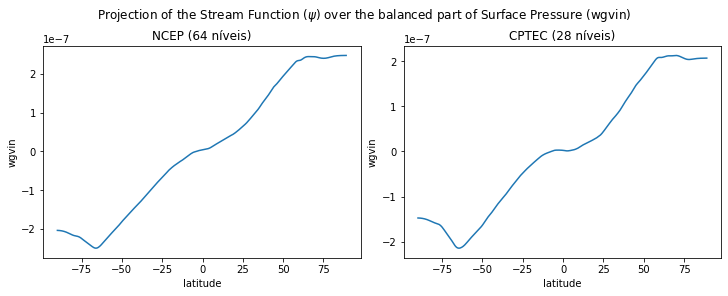

In [21]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.balprojs['wgvin'].isel(level=0,latitude=slice(0,-2)).plot.line(ax=ax[0])#, ylim=[-3e-7, 3e-7])
cptec_b.balprojs['wgvin'].isel(level=0,latitude=slice(0,-2)).plot.line(ax=ax[1])#, ylim=[-3e-7, 3e-7])

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Projection of the Stream Function ($\psi$) over the balanced part of Surface Pressure (wgvin)')
plt.show()

To check and compare the amplitudes from the instances `ncep_b` and `cptec_b`, see the next examples.

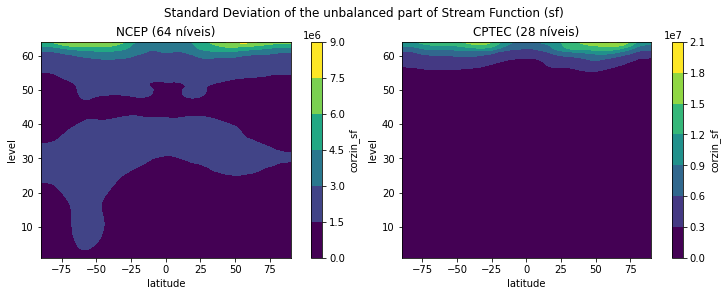

In [22]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.amplitudes['sf'].plot.contourf(ax=ax[0])#, vmin=0, vmax=6e6)
cptec_b.amplitudes['sf'].plot.contourf(ax=ax[1])#, vmin=0, vmax=6e6)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Standard Deviation of the unbalanced part of Stream Function (sf)')
plt.show()

In the following example, the vertical profiles from the amplitudes of the streamfunction `sf` from the instances `ncep_b` and `cptec_b` are compared:

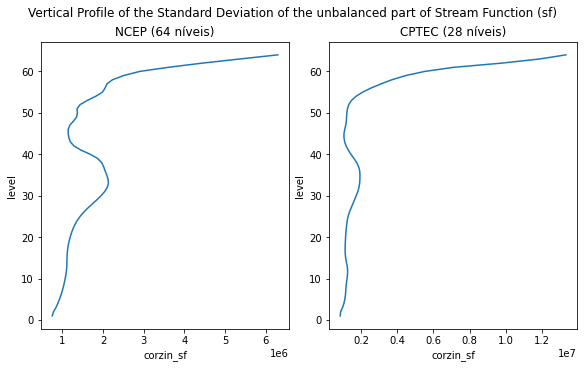

In [23]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8,5))

ncep_b.amplitudes['sf'].mean(dim='latitude').plot(ax=ax[0], y='level')
cptec_b.amplitudes['sf'].mean(dim='latitude').plot(ax=ax[1], y='level')

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Vertical Profile of the Standard Deviation of the unbalanced part of Stream Function (sf)')
plt.show()

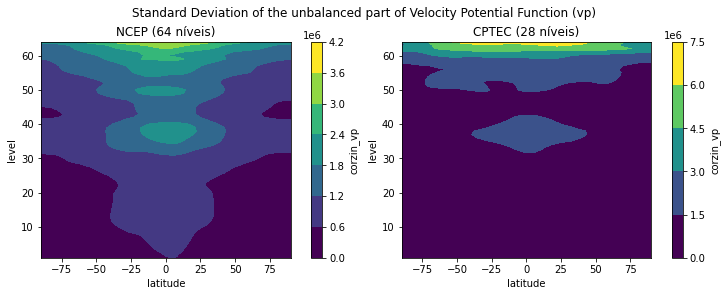

In [24]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.amplitudes['vp'].plot.contourf(ax=ax[0])#, vmin=0, vmax=6e6)
cptec_b.amplitudes['vp'].plot.contourf(ax=ax[1])#, vmin=0, vmax=6e6)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Standard Deviation of the unbalanced part of Velocity Potential Function (vp)')
plt.show()

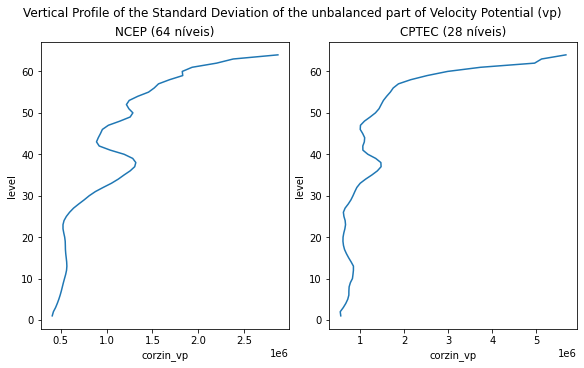

In [25]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8,5))

ncep_b.amplitudes['vp'].mean(dim='latitude').plot(ax=ax[0], y='level')
cptec_b.amplitudes['vp'].mean(dim='latitude').plot(ax=ax[1], y='level')

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Vertical Profile of the Standard Deviation of the unbalanced part of Velocity Potential (vp)')
plt.show()

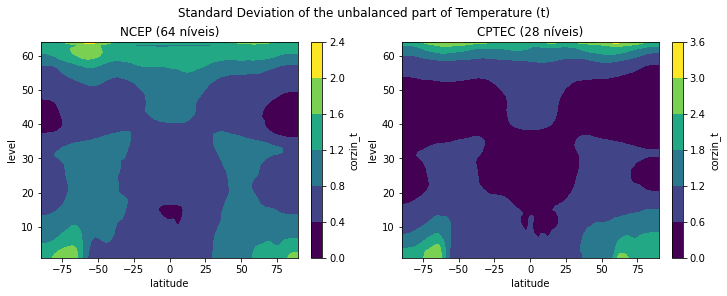

In [26]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.amplitudes['t'].plot.contourf(ax=ax[0])#, vmin=0, vmax=5)
cptec_b.amplitudes['t'].plot.contourf(ax=ax[1])#, vmin=0, vmax=5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Standard Deviation of the unbalanced part of Temperature (t)')
plt.show()

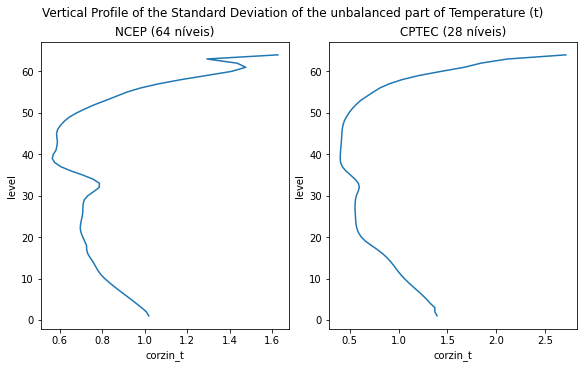

In [27]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8,5))

ncep_b.amplitudes['t'].mean(dim='latitude').plot(ax=ax[0], y='level')
cptec_b.amplitudes['t'].mean(dim='latitude').plot(ax=ax[1], y='level')

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Vertical Profile of the Standard Deviation of the unbalanced part of Temperature (t)')
plt.show()

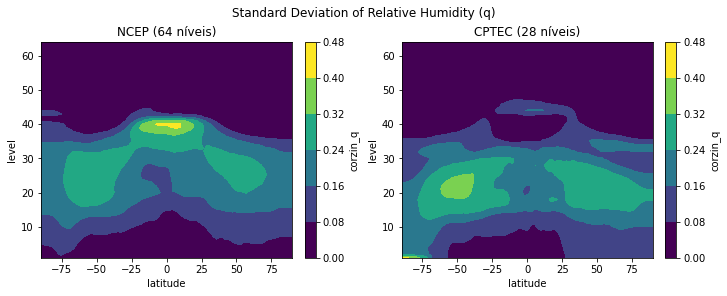

In [28]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.amplitudes['q'].plot.contourf(ax=ax[0])#, vmin=0, vmax=0.5)
cptec_b.amplitudes['q'].plot.contourf(ax=ax[1])#, vmin=0, vmax=0.5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Standard Deviation of Relative Humidity (q)')
plt.show()

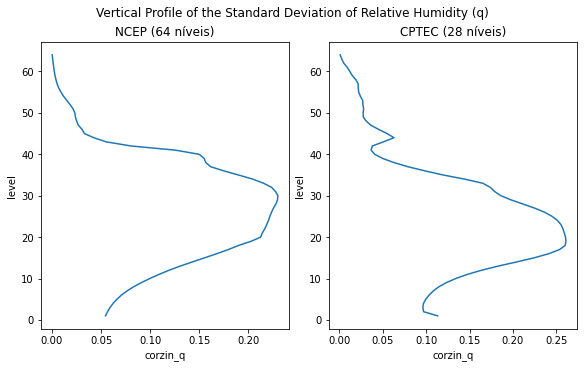

In [29]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8,5))

ncep_b.amplitudes['q'].mean(dim='latitude').plot(ax=ax[0], y='level')
cptec_b.amplitudes['q'].mean(dim='latitude').plot(ax=ax[1], y='level')

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Vertical Profile of the Standard Deviation of Relative Humidity (q)')
plt.show()

In [30]:
#fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))
#
#ncep_b.amplitudes['qin'].plot.contourf(ax=ax[0])#, vmin=0, vmax=0.5)
#cptec_b.amplitudes['qin'].plot.contourf(ax=ax[1])#, vmin=0, vmax=0.5)

In [31]:
#fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))
#
#ncep_b.amplitudes['qin'].mean(dim='latitude').plot(ax=ax[0], y='sigma')
#cptec_b.amplitudes['qin'].mean(dim='latitude').plot(ax=ax[1], y='sigma')

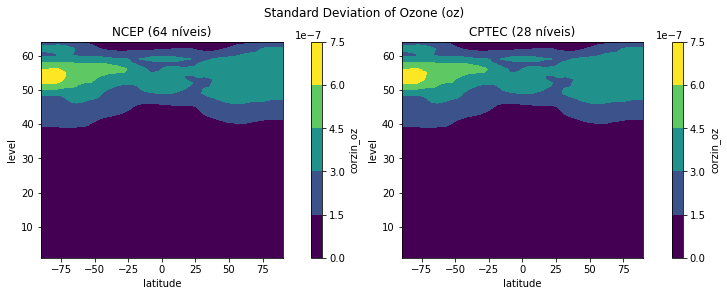

In [32]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.amplitudes['oz'].plot.contourf(ax=ax[0])#, vmin=0, vmax=7.5e-7)
cptec_b.amplitudes['oz'].plot.contourf(ax=ax[1])#, vmin=0, vmax=7.5e-7)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Standard Deviation of Ozone (oz)')
plt.show()

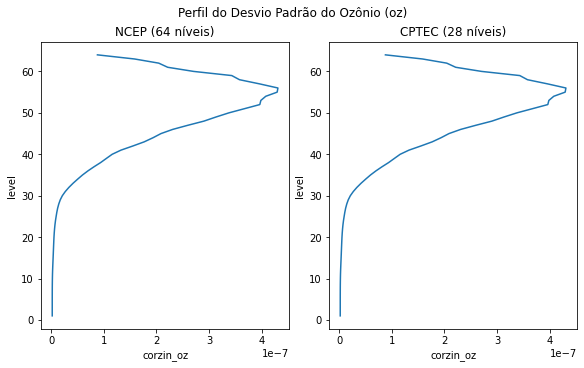

In [33]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8,5))

ncep_b.amplitudes['oz'].mean(dim='latitude').plot(ax=ax[0], y='level')
cptec_b.amplitudes['oz'].mean(dim='latitude').plot(ax=ax[1], y='level')

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Perfil do Desvio Padrão do Ozônio (oz)')
plt.show()

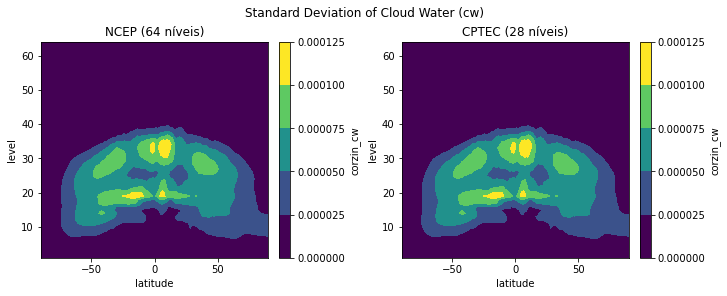

In [34]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.amplitudes['cw'].plot.contourf(ax=ax[0])#, vmin=0, vmax=7.5e-7)
cptec_b.amplitudes['cw'].plot.contourf(ax=ax[1])#, vmin=0, vmax=7.5e-7)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Standard Deviation of Cloud Water (cw)')
plt.show()

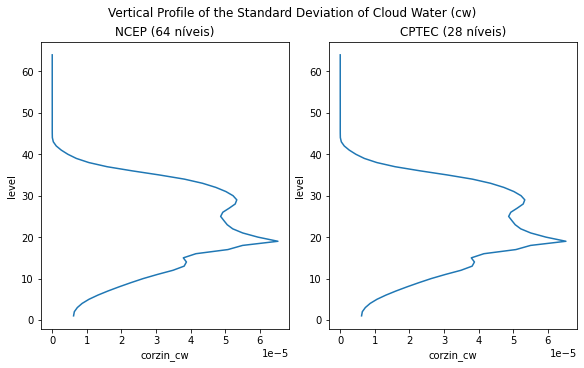

In [35]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8,5))

ncep_b.amplitudes['cw'].mean(dim='latitude').plot(ax=ax[0], y='level')
cptec_b.amplitudes['cw'].mean(dim='latitude').plot(ax=ax[1], y='level')

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Vertical Profile of the Standard Deviation of Cloud Water (cw)')
plt.show()

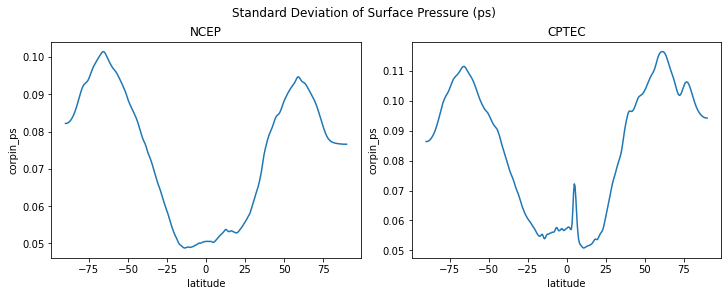

In [36]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.amplitudes['ps'].plot(ax=ax[0])#, vmin=0, vmax=0.2)
cptec_b.amplitudes['ps'].plot(ax=ax[1])#, vmin=0, vmax=0.2)

ax[0].set_title('NCEP')
ax[1].set_title('CPTEC')

plt.suptitle('Standard Deviation of Surface Pressure (ps)')
plt.show()

In the next figures, the amplitudes of the sea surface temperature (`sst`) for the instances `ncep_b` and `cptec_b` are shown.

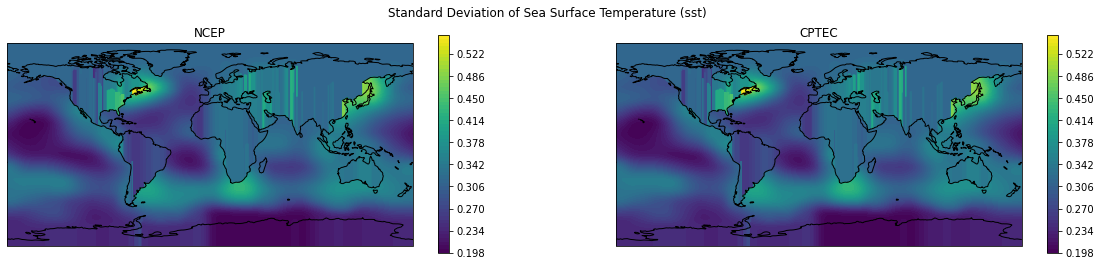

In [37]:
plt.figure(figsize=(20,4))#, constrained_layout=True)

ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='white'))
obj1 = ax1.contourf(ncep_b.lons, ncep_b.lats, ncep_b.amplitudes['sst'], 60, transform=ccrs.PlateCarree())
plt.colorbar(obj1)
ax1.coastlines()

ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='white'))
obj2 = ax2.contourf(cptec_b.lons, cptec_b.lats, cptec_b.amplitudes['sst'], 60, transform=ccrs.PlateCarree())
plt.colorbar(obj2)
ax2.coastlines()

ax1.set_title('NCEP')
ax2.set_title('CPTEC')

plt.suptitle('Standard Deviation of Sea Surface Temperature (sst)')
plt.show()

In the same manner we did for the amplitudes, the horizontal length scales from the instances `ncep_b` and `cptec_b` can also be compared. See the next examples.

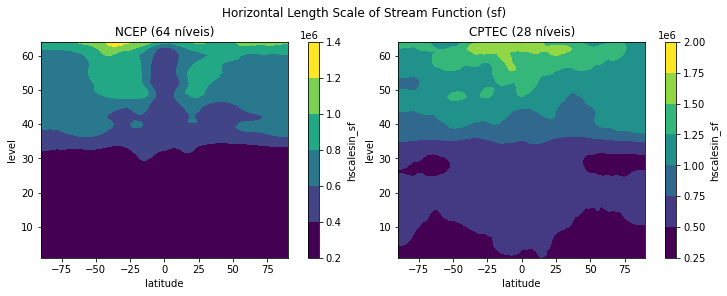

In [38]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.hscales['sf'].plot.contourf(ax=ax[0])#, vmin=0, vmax=1.5e6)
cptec_b.hscales['sf'].plot.contourf(ax=ax[1])#, vmin=0, vmax=1.5e6)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Horizontal Length Scale of Stream Function (sf)')
plt.show()

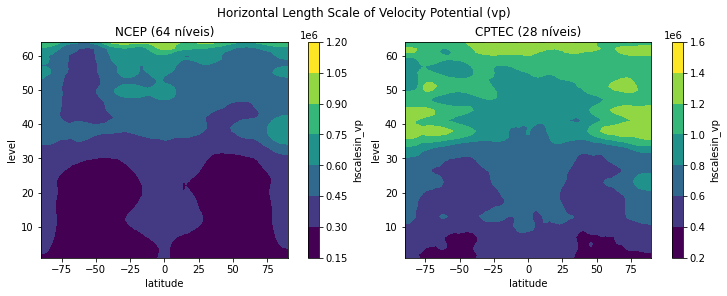

In [39]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.hscales['vp'].plot.contourf(ax=ax[0])#, vmin=0, vmax=1.5e6)
cptec_b.hscales['vp'].plot.contourf(ax=ax[1])#, vmin=0, vmax=1.5e6)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Horizontal Length Scale of Velocity Potential (vp)')
plt.show()

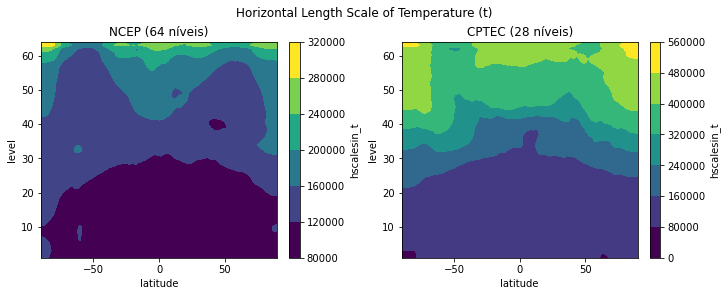

In [40]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.hscales['t'].plot.contourf(ax=ax[0])#, vmin=0, vmax=3.5e5)
cptec_b.hscales['t'].plot.contourf(ax=ax[1])#, vmin=0, vmax=3.5e5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Horizontal Length Scale of Temperature (t)')
plt.show()

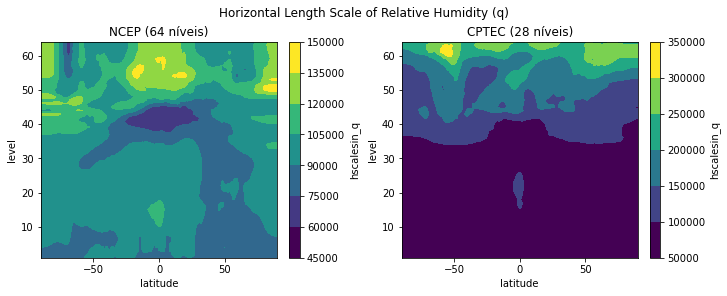

In [41]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.hscales['q'].plot.contourf(ax=ax[0])#, vmin=0, vmax=1.5e5)
cptec_b.hscales['q'].plot.contourf(ax=ax[1])#, vmin=0, vmax=1.5e5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Horizontal Length Scale of Relative Humidity (q)')
plt.show()

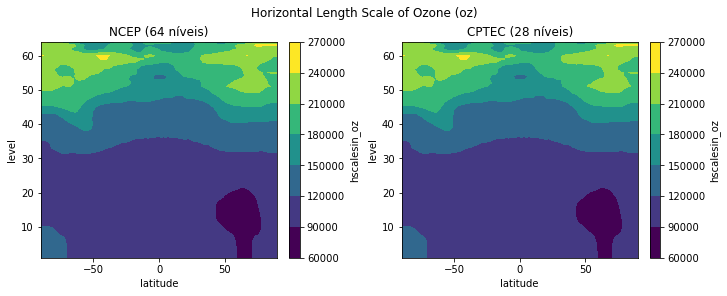

In [42]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.hscales['oz'].plot.contourf(ax=ax[0])#, vmin=0, vmax=2.5e5)
cptec_b.hscales['oz'].plot.contourf(ax=ax[1])#, vmin=0, vmax=2.5e5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Horizontal Length Scale of Ozone (oz)')
plt.show()

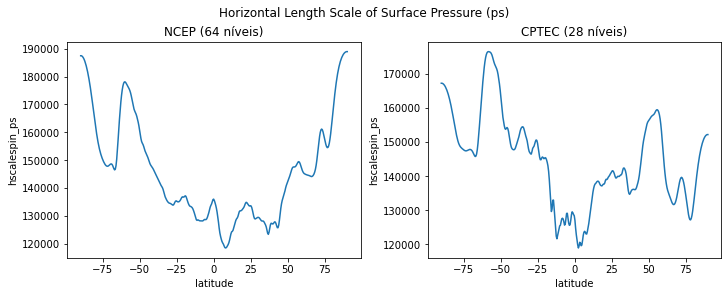

In [43]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.hscales['ps'].plot(ax=ax[0])#, vmin=0, vmax=2.5e5)
cptec_b.hscales['ps'].plot(ax=ax[1])#, vmin=0, vmax=2.5e5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Horizontal Length Scale of Surface Pressure (ps)')
plt.show()

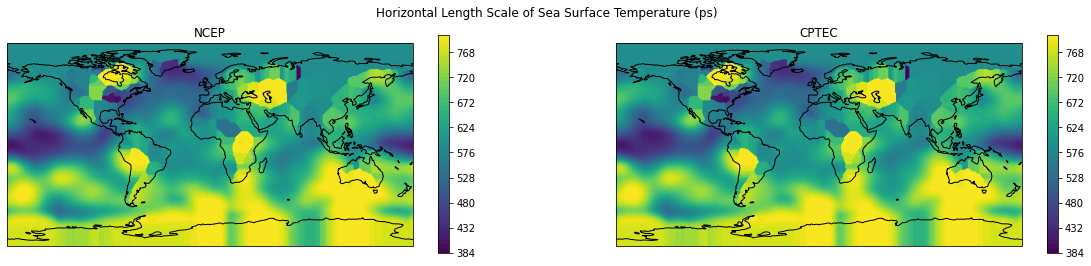

In [44]:
plt.figure(figsize=(20,4))#, constrained_layout=True)

ax1 = plt.subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='white'))
obj1 = ax1.contourf(ncep_b.lons, ncep_b.lats, ncep_b.hscales['sst'], 60, transform=ccrs.PlateCarree())
plt.colorbar(obj1)
ax1.coastlines()

ax2 = plt.subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='white'))
obj2 = ax2.contourf(cptec_b.lons, cptec_b.lats, cptec_b.hscales['sst'], 60, transform=ccrs.PlateCarree())
plt.colorbar(obj2)
ax2.coastlines()

ax1.set_title('NCEP')
ax2.set_title('CPTEC')

plt.suptitle('Horizontal Length Scale of Sea Surface Temperature (ps)')
plt.show()

In the same manner we did for the amplitudes, the vertical length scales from the instances `ncep_b` and `cptec_b` can also be compared. See the next examples.

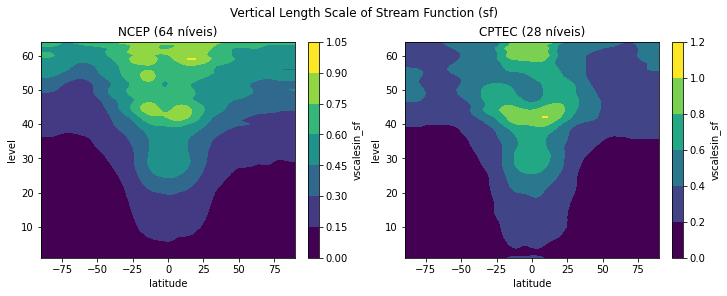

In [45]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.vscales['sf'].plot.contourf(ax=ax[0])#, vmin=0, vmax=2.5e5)
cptec_b.vscales['sf'].plot.contourf(ax=ax[1])#, vmin=0, vmax=2.5e5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Vertical Length Scale of Stream Function (sf)')
plt.show()

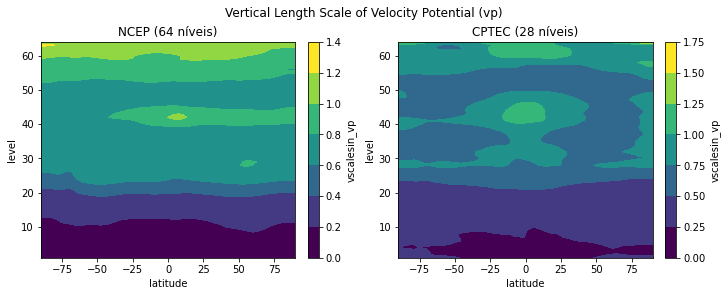

In [46]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.vscales['vp'].plot.contourf(ax=ax[0])#, vmin=0, vmax=2.5e5)
cptec_b.vscales['vp'].plot.contourf(ax=ax[1])#, vmin=0, vmax=2.5e5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Vertical Length Scale of Velocity Potential (vp)')
plt.show()

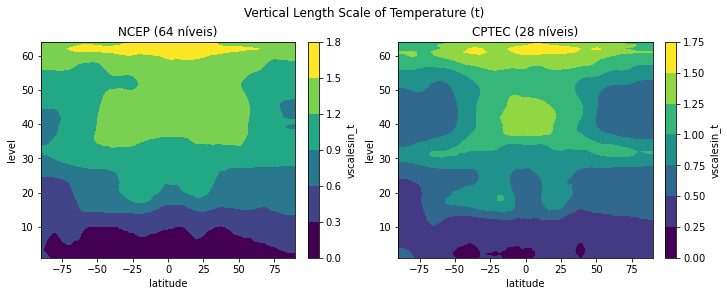

In [47]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.vscales['t'].plot.contourf(ax=ax[0])#, vmin=0, vmax=2.5e5)
cptec_b.vscales['t'].plot.contourf(ax=ax[1])#, vmin=0, vmax=2.5e5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Vertical Length Scale of Temperature (t)')
plt.show()

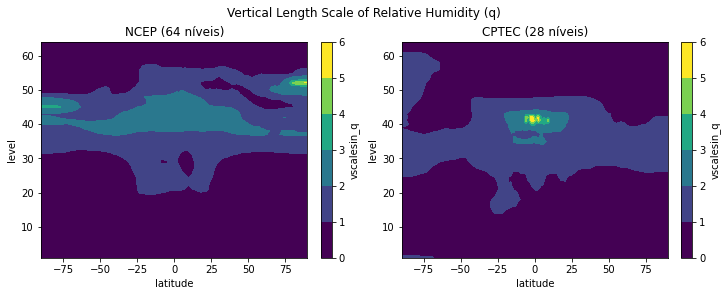

In [48]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.vscales['q'].plot.contourf(ax=ax[0])#, vmin=0, vmax=2.5e5)
cptec_b.vscales['q'].plot.contourf(ax=ax[1])#, vmin=0, vmax=2.5e5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Vertical Length Scale of Relative Humidity (q)')
plt.show()

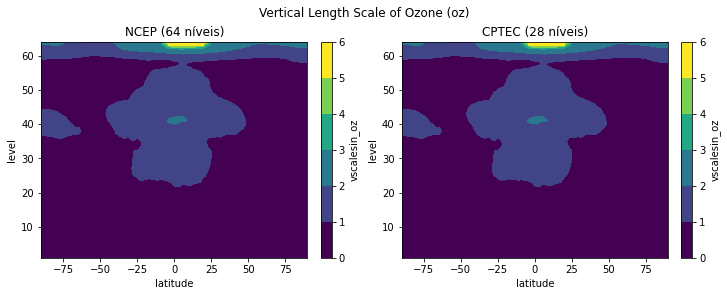

In [49]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.vscales['oz'].plot.contourf(ax=ax[0])#, vmin=0, vmax=2.5e5)
cptec_b.vscales['oz'].plot.contourf(ax=ax[1])#, vmin=0, vmax=2.5e5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Vertical Length Scale of Ozone (oz)')
plt.show()

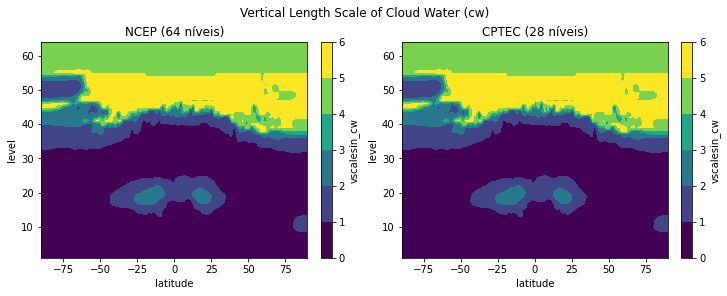

In [50]:
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))

ncep_b.vscales['cw'].plot.contourf(ax=ax[0])#, vmin=0, vmax=2.5e5)
cptec_b.vscales['cw'].plot.contourf(ax=ax[1])#, vmin=0, vmax=2.5e5)

ax[0].set_title('NCEP (64 níveis)')
ax[1].set_title('CPTEC (28 níveis)')

plt.suptitle('Vertical Length Scale of Cloud Water (cw)')
plt.show()